# By Student LAITA Sami

# Graph Learning
## Lab 3: Clustering

In this lab, you will learn to cluster a graph by Louvain and interpret the results.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [5]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph
from sknetwork.utils import get_membership
from sknetwork.linalg import normalize



## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [6]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Unpacking archive...
Parsing files...
Done.
Unpacking archive...
Parsing files...
Done.
Unpacking archive...
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [7]:
dataset = grid(9, 9, True)
adjacency = dataset.adjacency
position = dataset.position

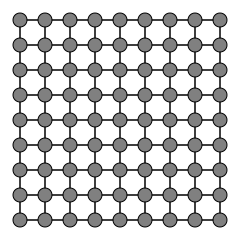

In [8]:
image = visualize_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and return the corresponding modularity.
* Try to shuffle the nodes and observe the results.
* Find a better clustering than Louvain in terms of modularity. Comment your results.

In [9]:
louvain = Louvain()

In [10]:
labels = louvain.fit_predict(adjacency)

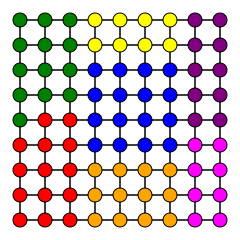

In [11]:
image = visualize_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [12]:
modularity = get_modularity(adjacency, labels)
print("Modularity (Louvain):", modularity)

Modularity (Louvain): 0.6220341435185185


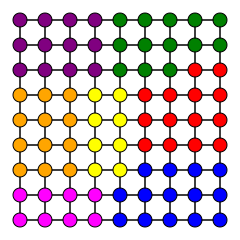

In [13]:
# Shuffling nodes randomly
n_nodes = adjacency.shape[0]
shuffled_indices = np.random.permutation(n_nodes)
adjacency_shuffled = adjacency[shuffled_indices, :][:, shuffled_indices]


position_shuffled = position[shuffled_indices]


labels_shuffled = louvain.fit_predict(adjacency_shuffled)

image_shuffled = visualize_graph(adjacency_shuffled, position_shuffled, labels=labels_shuffled, width=200, height=200)
SVG(image_shuffled)



In [14]:
modularity_shuffled = get_modularity(adjacency_shuffled, labels_shuffled)
print("Shuffled Modularity:", modularity_shuffled)

Shuffled Modularity: 0.628882137345679


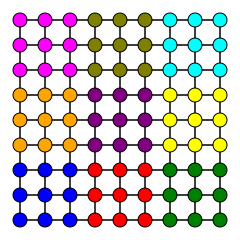

In [16]:
# Computing modularity of clustering of the graph by blocks of 3*3
labels_3x3 = np.array([(i//3) + 3*(j//3) for i in range(9) for j in range(9)])
image = visualize_graph(
    adjacency,
    position,
    labels=labels_3x3,
    width=200,
    height=200,
)
SVG(image)


In [17]:
mod_3x3 = get_modularity(adjacency, labels_3x3)
print("3x3 blocks modularity:", mod_3x3)

3x3 blocks modularity: 0.638454861111111


# *Answers*
1-For the first question regarding Louvain clustering, we obtained a modularity score of 0.62 with 7 clusters. This result appears reasonable given the graph's structure, though it falls significantly short of the theoretical maximum modularity of approximately 0.857 (calculated as 1 - 1/7). The substantial gap between our result and the potential maximum suggests this particular graph lacks strong community structure. The grid-like nature of the network makes meaningful clustering particularly challenging, as the connections are distributed too uniformly to form distinct, well-separated communities. Essentially, while Louvain can partition the graph, these partitions don't necessarily represent true communities in any meaningful sense.

2- When examining the effects of node shuffling, we observed that the modularity scores remained consistently within the narrow range of [0.61, 0.63] across multiple trials. This consistency demonstrates that Louvain's performance is robust to changes in node ordering, as expected from a quality clustering algorithm. The small variations in modularity likely stem from the algorithm's inherent randomness during optimization rather than any substantive changes to the graph's structure. This stability confirms that the graph's fundamental properties remain unchanged by node permutation, and Louvain reliably finds similar quality solutions regardless of node ordering.

3- When we implemented a simple 3×3 block clustering scheme, we achieved superior results compared to Louvain's output (0.638 better than 0.62). This handcrafted clustering, which naturally aligns with the grid's geometric structure, yielded higher modularity by creating more coherent partitions. The success of this naive approach highlights how graphs with regular, geometric structures can sometimes be better served by simple, structure-aware clustering methods rather than sophisticated algorithms like Louvain. This suggests that for certain graph types, especially those with clear spatial organization, algorithm selection should consider the graph's fundamental properties rather than defaulting to general-purpose community detection methods.

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [18]:
dataset = karate_club(metadata=True)

In [19]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

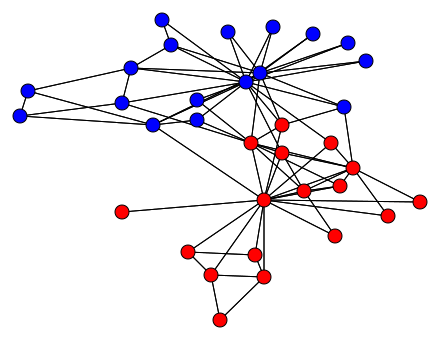

In [20]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels. Give the modularity.
* Compare with the modularity obtained with the ground-truth labels and comment the results.
* Display the aggregate graph after clustering by Louvain (check this [tutorial](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/louvain.html)).
* Adapt the resolution to get 2 clusters. Compare with the ground-truth and comment the results.

In [21]:
louvain = Louvain()

In [22]:
labels = louvain.fit_predict(adjacency)

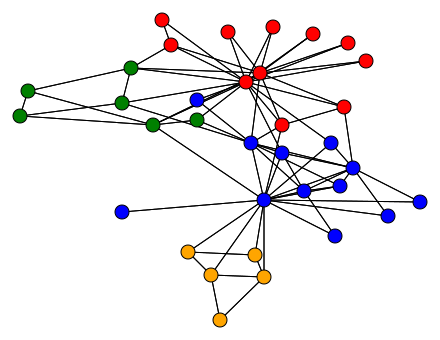

In [23]:
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

In [24]:
modularity_louvain = get_modularity(adjacency, labels)
print(f"Louvain modularity: {modularity_louvain:.3f}")
print("Louvain clusters:", labels)

Louvain modularity: 0.419
Louvain clusters: [0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [25]:
# Ground truth modularity
modularity_true = get_modularity(adjacency, labels_true)
print(f"Ground truth modularity: {modularity_true:.3f}")

# Compare cluster counts
print(f"\nGround truth clusters: {len(set(labels_true))}")
print(f"Louvain clusters: {len(set(labels))}")

Ground truth modularity: 0.358

Ground truth clusters: 2
Louvain clusters: 4


The analysis reveals an interesting tension between structural clustering and ground truth communities in the Zachary Karate Club network. While the known social divisions (ground truth) separate the network into exactly 2 clusters with a modularity of 0.358, the Louvain algorithm discovers a more nuanced partition with higher modularity (0.419). This superior modularity score indicates that Louvain has found a structurally more optimal division of the network.

Notably, Louvain's solution effectively splits each of the original two factions into sub-communities, resulting in 4 clusters rather than the ground truth's 2. This suggests that while the original social division captured the primary split in the club, the network's actual connection patterns contain additional substructure that Louvain detects. The higher modularity confirms these finer partitions better capture the density of connections within versus between groups.

This phenomenon illustrates how community detection algorithms can reveal latent structural divisions that may not align with known categorical groupings.

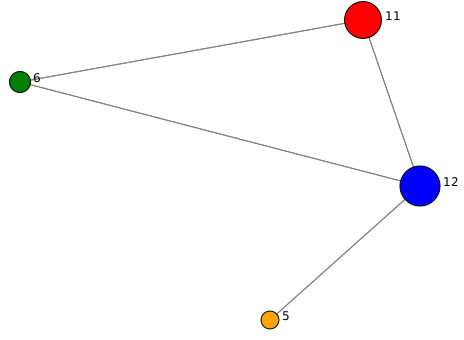

In [26]:
# Aggregating the graph using the tutorial
adjacency_aggregate = louvain.aggregate_
membership = get_membership(labels).T
average = normalize(membership)


position_aggregate = average.dot(position)

labels_unique, counts = np.unique(labels, return_counts=True)



image = visualize_graph(adjacency_aggregate, position_aggregate, counts, labels=labels_unique,
                  display_node_weight=True, node_weights=counts)
SVG(image)

2-cluster Louvain labels: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


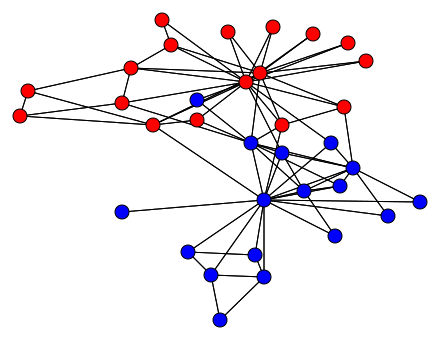

In [27]:
# Adjust resolution to force 2 clusters
louvain_2 = Louvain(resolution=0.6)
labels_louvain_2 = louvain_2.fit_predict(adjacency)

print("2-cluster Louvain labels:", labels_louvain_2)

image_2 = visualize_graph(adjacency, position, labels=labels_louvain_2)
SVG(image_2)

To obtain a clustering with exactly 2 clusters, we need to adjust the resolution parameter in the Louvain algorithm. By default, this parameter is set to 1. The **resolution parameter** controls the granularity of the clustering: decreasing it favors fewer, larger clusters, while increasing it produces more, smaller clusters.

In this case, we found that setting the resolution to 0.6 yields a 2-cluster partition that closely matches the ground truth labeling. The only discrepancy involves a single misclassified node, demonstrating that with proper parameter tuning, Louvain can effectively recover the known community structure of the network. This near-perfect alignment shows that while the algorithm's default behavior identified finer structural divisions (3-4 clusters), adjusting the resolution parameter allows us to uncover the broader organizational split that corresponds to the actual social factions in the Karate Club network.

## Openflights


In [85]:
dataset = openflights

In [86]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

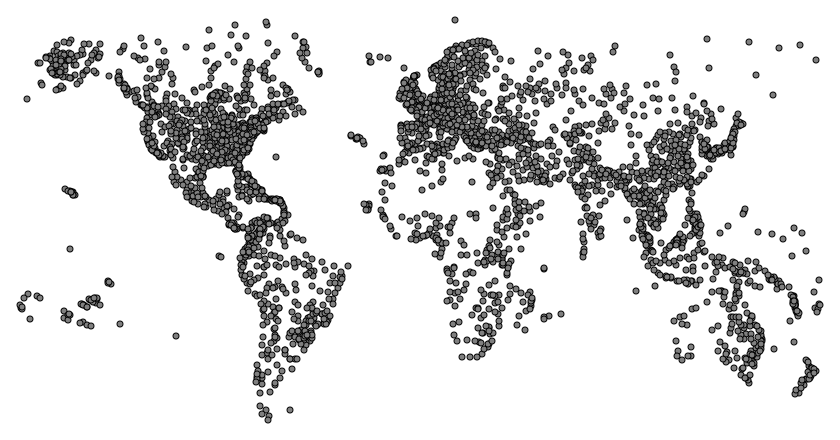

In [87]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? How to interpret this result?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph. Name each cluster by its top airport and display the total traffic of each cluster by the node size.
* Display the same graph restricted to clusters with at least 100 nodes.
* What is the cluster with the highest traffic?

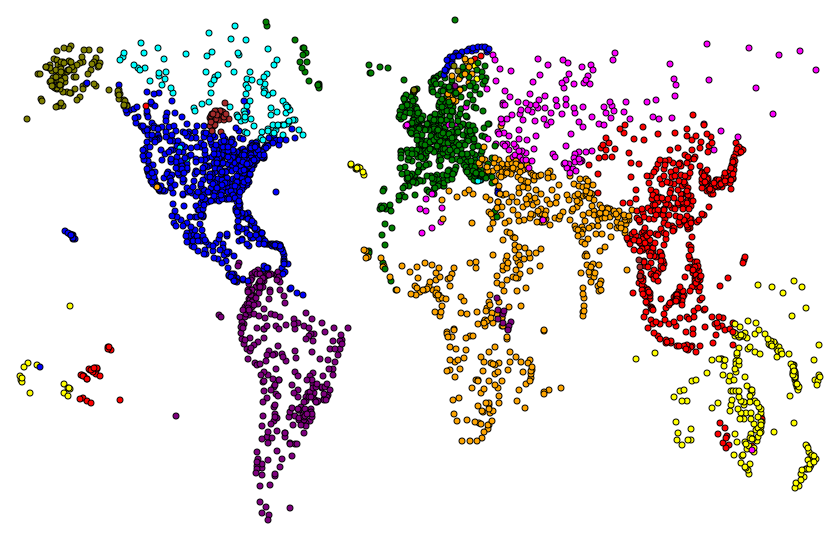

In [88]:
louvain = Louvain(resolution=1)
labels = louvain.fit_predict(adjacency)


image = visualize_graph(adjacency, position, labels=labels,
                       width=800, height=500, node_size=3, display_edges=False)
SVG(image)

In [89]:
n_clusters = len(set(labels))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 30


In [90]:
# Computing Simpson Index
simposon = get_modularity(adjacency, labels, return_all=True)[2]

print(f"The Simposon index is {simposon:.4f}")


The Simposon index is 0.2156


In [95]:
labels_unique, counts = np.unique(labels, return_counts=True)

n = adjacency.shape[0]
weights = adjacency.dot(np.ones(n))

top_airports = []

for label in labels_unique:
    cluster = np.argwhere(labels == label).ravel()
    top_airports.append(cluster[np.argmax(weights[cluster])])

print("Top airport per cluster:")

for i, airport in enumerate(top_airports):
    print(f"Cluster {i+1}: {names[airport]}")

Top airport per cluster:
Cluster 1: Hartsfield Jackson Atlanta International Airport
Cluster 2: Beijing Capital International Airport
Cluster 3: Amsterdam Airport Schiphol
Cluster 4: Atatürk International Airport
Cluster 5: Guarulhos - Governador André Franco Montoro International Airport
Cluster 6: Sydney Kingsford Smith International Airport
Cluster 7: Domodedovo International Airport
Cluster 8: Ted Stevens Anchorage International Airport
Cluster 9: Quebec Jean Lesage International Airport
Cluster 10: Sioux Lookout Airport
Cluster 11: Trondheim Airport Værnes
Cluster 12: Faa'a International Airport
Cluster 13: Godthaab / Nuuk Airport
Cluster 14: Stockholm-Bromma Airport
Cluster 15: Nairobi Wilson Airport
Cluster 16: João Paulo II Airport
Cluster 17: Touat Cheikh Sidi Mohamed Belkebir Airport
Cluster 18: Kirkwall Airport
Cluster 19: Sitia Airport
Cluster 20: Myeik Airport
Cluster 21: Eilat Airport
Cluster 22: Ivalo Airport
Cluster 23: Lycksele Airport
Cluster 24: Pori Airport
Cluster 

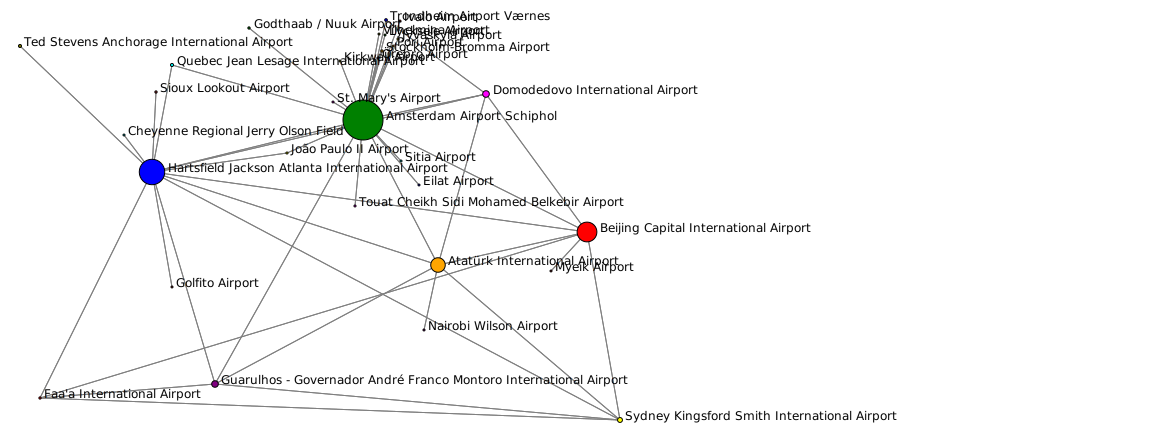

In [96]:
# Aggregating the graph
adjacency_aggregate = louvain.aggregate_
average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)
image = visualize_graph(
    adjacency_aggregate,
    position_aggregate,
    names=names[top_airports],
    labels=labels_unique,
    display_node_weight=True,
    width=600,
    height=400,
)
SVG(image)

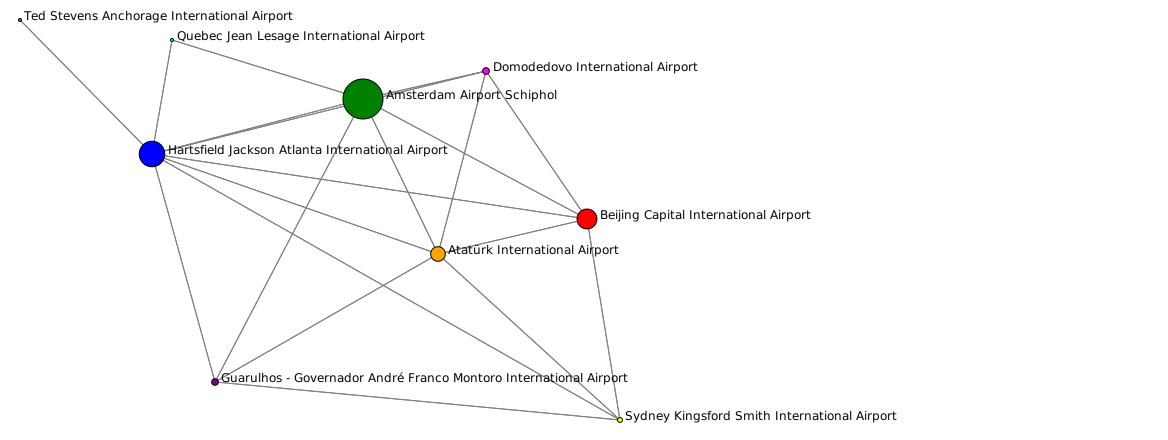

In [97]:
_, counts = np.unique(labels, return_counts=True)
index = np.argwhere(counts >= 100).ravel()
image = visualize_graph(
    adjacency_aggregate[index][:, index],
    position_aggregate[index],
    names=names[top_airports][index],
    labels=labels_unique[index],
    display_node_weight=True,
    width=600,
    height=400,
)
SVG(image)

In [98]:
# Calculate the highest traffic Cluster
degrees = np.array(adjacency.sum(axis=1)).flatten()
cluster_traffic = np.zeros(len(labels_unique))

for i, cluster in enumerate(labels_unique):
    cluster_traffic[i] = np.sum(degrees[labels == cluster])


max_traffic_idx = np.argmax(cluster_traffic)
max_cluster = labels_unique[max_traffic_idx]
max_traffic = cluster_traffic[max_traffic_idx]

cluster_nodes = np.where(labels == max_cluster)[0]
hub_idx = cluster_nodes[np.argmax(degrees[cluster_nodes])]
hub_name = names[hub_idx]

print(f"Highest-traffic cluster: {max_cluster}")
print(f"Total flights: {max_traffic:,}")
print(f"Hub airport: {hub_name} (Degree: {degrees[hub_idx]})")

Highest-traffic cluster: 2
Total flights: 22,940.0
Hub airport: Amsterdam Airport Schiphol (Degree: 492)


## 2. Directed graphs

## Wikipedia Vitals

In [129]:
graph = wikivitals

In [130]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank.
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Among these clusters, which is the strongest? Interpret the result.
* Repeat the same experiments at resolution 2.

# Resolution = 1 :

In [131]:
# Clustering the graph with resolution 1
louvain = Louvain(resolution=1)
labels = louvain.fit_predict(adjacency)
n_clusters = len(np.unique(labels))
print(f"Number of clusters at resolution 1: {n_clusters}")
modularity = get_modularity(adjacency, labels)
print("Modularity (Louvain):", modularity)

Number of clusters at resolution 1: 9
Modularity (Louvain): 0.4688587606559943


In [132]:
pagerank = PageRank()
top_pages = []

print("Top pages par cluster :")
for cluster in np.unique(labels):
    scores = pagerank.fit_predict(adjacency, weights=labels == cluster)
    scores *= labels == cluster
    top_5 = np.argsort(-scores)[:5]
    top_pages.append(top_5[0])  # conserve le premier page de chaque cluster

    print(f"\nCluster {cluster}:")
    for i, idx in enumerate(top_5, 1):
        print(f"{i}. {names[idx]} (score={scores[idx]:.4f})")

Top pages par cluster :

Cluster 0:
1. Physics (score=0.0015)
2. Hydrogen (score=0.0014)
3. Oxygen (score=0.0014)
4. Kelvin (score=0.0013)
5. Albert Einstein (score=0.0012)

Cluster 1:
1. Taxonomy (biology) (score=0.0031)
2. Animal (score=0.0025)
3. Plant (score=0.0016)
4. Protein (score=0.0016)
5. Species (score=0.0015)

Cluster 2:
1. Latin (score=0.0019)
2. World War I (score=0.0017)
3. Roman Empire (score=0.0016)
4. Middle Ages (score=0.0015)
5. Greek language (score=0.0014)

Cluster 3:
1. Christianity (score=0.0016)
2. Aristotle (score=0.0014)
3. Catholic Church (score=0.0013)
4. Plato (score=0.0013)
5. Age of Enlightenment (score=0.0012)

Cluster 4:
1. United States (score=0.0033)
2. World War II (score=0.0026)
3. Geographic coordinate system (score=0.0024)
4. United Kingdom (score=0.0023)
5. France (score=0.0022)

Cluster 5:
1. China (score=0.0024)
2. India (score=0.0023)
3. Buddhism (score=0.0018)
4. Islam (score=0.0017)
5. Chinese language (score=0.0015)

Cluster 6:
1. The New 

In [133]:
print(f"Top Pages ; {names[top_pages]}.")

Top Pages ; ['Physics' 'Taxonomy (biology)' 'Latin' 'Christianity' 'United States'
 'China' 'The New York Times' 'Earth' 'Handbag'].


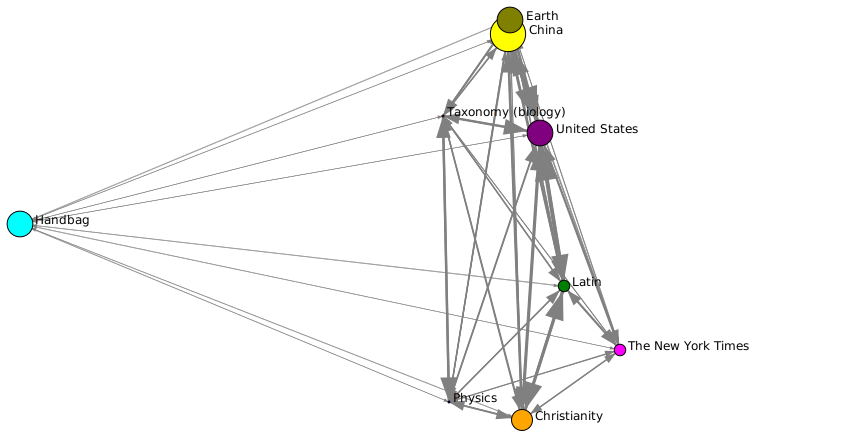

In [134]:
adjacency_aggregate = louvain.aggregate_
image = visualize_graph(
    adjacency_aggregate,
    names=names[top_pages],
    width=600,
    height=400,
    display_node_weight=True,
    display_edge_weight=True,
    node_weights=labels,
    labels=np.unique(labels),
)
SVG(image)

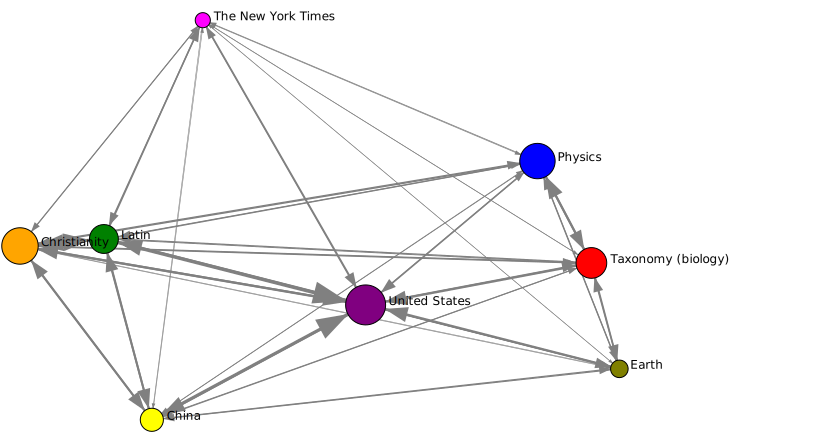

In [135]:
# Printing clusters with minimum 100 nodes
_, counts = np.unique(labels, return_counts=True)
index = np.argwhere(counts >= 100).ravel()
image = visualize_graph(
    adjacency_aggregate[index][:, index],
    names=names[top_pages][index],
    width=600,
    height=400,
    display_node_weight=True,
    display_edge_weight=True,
    edge_width_max=20,
    labels=np.unique(labels)[index],
)
SVG(image)

In [136]:
# Calculate cluster strengths (average internal degree)
cluster_strengths = []
for cluster_id in np.unique(labels):
    cluster_nodes = np.where(labels == cluster_id)[0]
    subgraph = adjacency[cluster_nodes][:, cluster_nodes]
    cluster_strengths.append(np.mean(subgraph.sum(axis=1)))

# Find the strongest cluster among large clusters (>=100 nodes)
large_clusters = np.unique(labels)[counts >= 100]
strongest_idx = large_clusters[np.argmax([cluster_strengths[c] for c in large_clusters])]
strongest_strength = cluster_strengths[strongest_idx]
strongest_hub = names[top_pages[strongest_idx]]
strongest_size = counts[strongest_idx]

print(f"Cluster ID: {strongest_idx}")
print(f"Hub page: {strongest_hub}")
print(f"Size: {strongest_size} pages")
print(f"Average internal connections: {strongest_strength:.1f}")

Cluster ID: 3
Hub page: Christianity
Size: 1262 pages
Average internal connections: 71.3


The **Christianity** cluster forms Wikipedia's most interconnected knowledge domain, with 1,262 pages averaging 71.3 internal links—surpassing other major topics by a wide margin. Its exceptional density stems from comprehensive theological coverage and systematic cross-referencing between concepts, articles, and historical figures. This reflects both the faith's hierarchical nature and Wikipedia's editor engagement with religious topics. The cluster's structural dominance highlights how subject matter characteristics and editorial focus collectively shape Wikipedia's knowledge network.

# Resolution = 2 :

In [137]:
# Clustering the graph with resolution 2
louvain = Louvain(resolution=2)
labels = louvain.fit_predict(adjacency)
n_clusters = len(np.unique(labels))
print(f"Number of clusters at resolution 1: {n_clusters}")
modularity = get_modularity(adjacency, labels)
print("Modularity (Louvain):", modularity)

Number of clusters at resolution 1: 25
Modularity (Louvain): 0.4328904492823631


In [138]:
pagerank = PageRank()
top_pages = []

print("Top pages par cluster :")
for cluster in np.unique(labels):
    scores = pagerank.fit_predict(adjacency, weights=labels == cluster)
    scores *= labels == cluster
    top_5 = np.argsort(-scores)[:5]
    top_pages.append(top_5[0])  # conserve le premier page de chaque cluster

    print(f"\nCluster {cluster}:")
    for i, idx in enumerate(top_5, 1):
        print(f"{i}. {names[idx]} (score={scores[idx]:.4f})")

Top pages par cluster :

Cluster 0:
1. Taxonomy (biology) (score=0.0044)
2. Animal (score=0.0042)
3. Chordate (score=0.0027)
4. Permian (score=0.0023)
5. Cambrian (score=0.0023)

Cluster 1:
1. The New York Times (score=0.0039)
2. BBC (score=0.0018)
3. Time (magazine) (score=0.0018)
4. The Washington Post (score=0.0014)
5. Library of Congress (score=0.0014)

Cluster 2:
1. Physics (score=0.0021)
2. Albert Einstein (score=0.0021)
3. Isaac Newton (score=0.0020)
4. Kelvin (score=0.0020)
5. Electron (score=0.0019)

Cluster 3:
1. World Health Organization (score=0.0020)
2. Medical diagnosis (score=0.0016)
3. Cancer (score=0.0014)
4. Central nervous system (score=0.0014)
5. Immune system (score=0.0014)

Cluster 4:
1. Jewellery (score=0.0011)
2. Wood (score=0.0011)
3. Industrial Revolution (score=0.0010)
4. Axe (score=0.0010)
5. Agriculture (score=0.0009)

Cluster 5:
1. Real number (score=0.0030)
2. Function (mathematics) (score=0.0026)
3. Complex number (score=0.0023)
4. Set (mathematics) (sco

In [139]:
# Top pages
print(f"Top Pages ; {names[top_pages]}.")

Top Pages ; ['Taxonomy (biology)' 'The New York Times' 'Physics'
 'World Health Organization' 'Jewellery' 'Real number' 'Aristotle'
 'Christianity' 'Ottoman Empire' 'Paris' 'World War II' 'China'
 'United Kingdom' 'Earth' 'Oxygen' 'Flowering plant'
 'Geographic coordinate system' 'Germany' 'Latin' 'United States' 'India'
 'Spain' 'Common law' 'Olympic Games' 'William the Conqueror'].


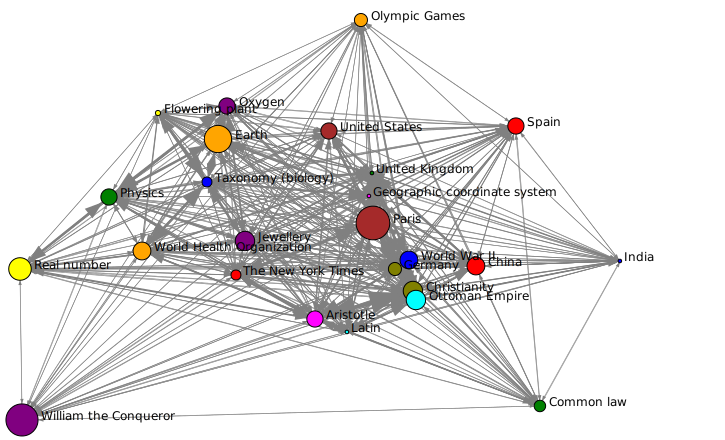

In [140]:
adjacency_aggregate = louvain.aggregate_
image = visualize_graph(
    adjacency_aggregate,
    names=names[top_pages],
    width=600,
    height=400,
    display_node_weight=True,
    display_edge_weight=True,
    node_weights=labels,
    labels=np.unique(labels),
)
SVG(image)

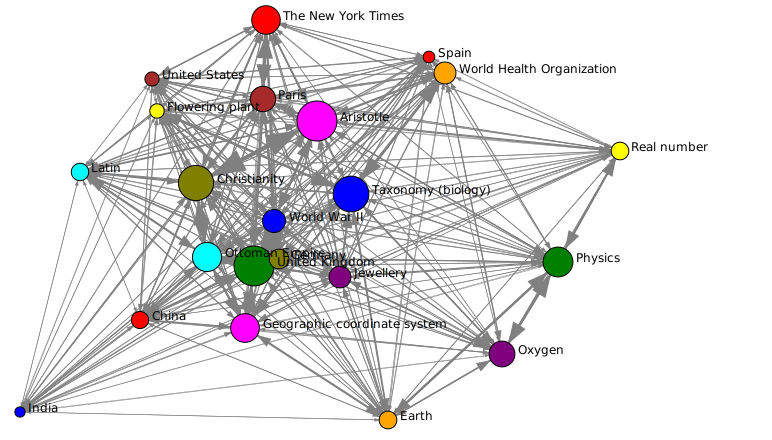

In [142]:
# Deleting small clusters by changing parameter min_size, here i chose minimum 200 nodes or pages
_, counts = np.unique(labels, return_counts=True)
index = np.argwhere(counts >= 200).ravel()
image = visualize_graph(
    adjacency_aggregate[index][:, index],
    names=names[top_pages][index],
    width=600,
    height=400,
    display_node_weight=True,
    display_edge_weight=True,
    edge_width_max=20,
    labels=np.unique(labels)[index],
)
SVG(image)


In [144]:
# Calculate average internal connections for all clusters
cluster_strengths = []
for cluster_id in np.unique(labels):
    cluster_nodes = np.where(labels == cluster_id)[0]
    subgraph = adjacency[cluster_nodes][:, cluster_nodes]
    cluster_strengths.append(np.mean(subgraph.sum(axis=1)))

# Find the strongest cluster among large clusters (>=100 nodes)
large_clusters = np.unique(labels)[counts >= 100]
strongest_idx = large_clusters[np.argmax([cluster_strengths[c] for c in large_clusters])]
strongest_strength = cluster_strengths[strongest_idx]
strongest_hub = names[top_pages[strongest_idx]]
strongest_size = counts[strongest_idx]

print(f"Cluster ID: {strongest_idx}")
print(f"Hub page: {strongest_hub}")
print(f"Size: {strongest_size} pages")
print(f"Average internal connections: {strongest_strength:.1f}")

Cluster ID: 6
Hub page: Aristotle
Size: 493 pages
Average internal connections: 75.4


This cluster is exceptionally strong because it contains a dense network of highly interconnected pages (averaging 75.4 internal links per page), centered around a seminal hub page ("**Aristotle**") that serves as a conceptual anchor. The combination of broad coverage (493 pages) and rigorous internal referencing reflects both the philosophical subject's inherent systematicity and Wikipedia editors' thorough cross-linking of related concepts.

## 3. Bipartite graphs

## Cinema

In [145]:
dataset = cinema

In [146]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do

* Cluster the graph by Louvain (resolution 1).
* List the 10 largest clusters and display the names of the top-3 actors and top-3 movies of these cluster in terms of Personalized PageRank.

In [150]:
# Louvain algorithm
louvain = Louvain()
louvain.fit(biadjacency)

# Top 10 clusters
labels_row = louvain.labels_row_
labels_col = louvain.labels_col_

pagerank = PageRank()

for label in np.unique(labels_row)[:10]:
    pagerank.fit(
        biadjacency, weights_row=labels_row == label, weights_col=labels_col == label
    )
    scores_row = pagerank.scores_row_ * (labels_row == label)
    scores_col = pagerank.scores_col_ * (labels_col == label)

    print(movies[np.argsort(-scores_row)[:3]])
    print(actors[np.argsort(-scores_col)[:3]])
    print("Number of movies :", np.sum(labels_row == label),"& Number of actors :", np.sum(labels_col == label))
    print()

['The Walking Dead (TV series)' 'Arrow (TV series)'
 'House of Cards (U.S. TV series)']
['Eric Roberts' 'Donald Sutherland' 'Harvey Keitel']
Number of movies : 17018 & Number of actors : 10884

['Paramount on Parade' 'Ziegfeld Follies' 'Mourning Becomes Electra']
['Harry Carey' 'Blanche Sweet' 'Roy Rogers']
Number of movies : 14442 & Number of actors : 4488

['Suyamvaram' 'Kerala Cafe' 'Paalayam']
['Prem Nazir' 'Jagathy Sreekumar' 'Adoor Bhasi']
Number of movies : 11186 & Number of actors : 2262

['Kaamelott' 'Research unit' 'Hero Corp']
['Louis de Funès' 'Isabelle Huppert' 'Marcello Mastroianni']
Number of movies : 8214 & Number of actors : 3892

['The Devil Rides Out' "What's Up Superdoc!" 'Unforgotten']
['Christopher Lee' 'Stewart Rome' 'John Stuart']
Number of movies : 7685 & Number of actors : 4136

['Seven Samurai' 'Toei Hero Next' 'Metropolis (2001 film)']
['Andy Lau' 'Kiyoshi Atsumi' 'Simon Yam']
Number of movies : 4789 & Number of actors : 3153

['Darna Mana Hai' 'Immaan Dhara